# How to extract data from HF repository

The idea is to get familiarize with the HF API to extract data from ML repositories.
Is important to realize that relevant metadata basically can be found in the readme.MD file.

In [1]:
from huggingface_hub import hf_hub_download
from huggingface_hub import ModelCard
from huggingface_hub import HfApi
from huggingface_hub.utils import EntryNotFoundError
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict

/home/vscode/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Download a specific file

In the quickstart guide of the [Hugging Face Hub API](https://huggingface.co/docs/huggingface_hub/v0.8.0/en/quick-start), there is an example on how to retrieve particular documents from the ML repository.  

In [2]:
hf_hub_download(repo_id="google/pegasus-xsum", filename="README.md")

'/home/vscode/.cache/huggingface/hub/models--google--pegasus-xsum/snapshots/8d8ffc158a3bee9fbb03afacdfc347c823c5ec8b/README.md'

Now, we would like to pick where is the document being downloaded. Even check if we can bring it to memory right away.

For the first problem we have the following [documentation](https://huggingface.co/docs/huggingface_hub/main/en/guides/download). We can use the `local_dir="path/to/folder"` attribute of the `hf_hub_download` function.

In [3]:
hf_hub_download(repo_id="google/pegasus-xsum", filename="README.md",local_dir="/home/vscode/README_files")

'/home/vscode/README_files/README.md'

### Model cards
Even better than the above, there are ways to only query the Model card metadata that is usually on the README.md file, using the [ModelCard](https://huggingface.co/docs/huggingface_hub/main/en/guides/model-cards) function. 

Now the problem with this approach is clear, not all the metadata can be found on the Model card, a lot of useful information can be extracted from the README.md file.

Even with the previous setback in can said that this functionality really helps to proccess the data better. 

Now I don't know if it is worth to spend one of the 10k limited requests we have every minute on a preprocessing step. 

In [4]:
card = ModelCard.load('google/pegasus-xsum')

#Get the textual part of the README.md file of the model 
print(card.text)

#Get the metadata part of README.md file of the model 
print(card.data)


### Pegasus Models
See Docs: [here](https://huggingface.co/transformers/master/model_doc/pegasus.html)

Original TF 1 code [here](https://github.com/google-research/pegasus)

Authors: Jingqing Zhang, Yao Zhao, Mohammad Saleh and Peter J. Liu on Dec 18, 2019

Maintained by: [@sshleifer](https://twitter.com/sam_shleifer)

Task: Summarization

The following is copied from the authors' README.

# Mixed & Stochastic Checkpoints

We train a pegasus model with sampled gap sentence ratios on both C4 and HugeNews, and stochastically sample important sentences. The updated the results are reported in this table.

| dataset | C4 | HugeNews | Mixed & Stochastic|
| ---- | ---- | ---- | ----|
| xsum | 45.20/22.06/36.99 | 47.21/24.56/39.25 | 47.60/24.83/39.64|
| cnn_dailymail | 43.90/21.20/40.76 | 44.17/21.47/41.11 | 44.16/21.56/41.30|
| newsroom | 45.07/33.39/41.28 | 45.15/33.51/41.33 | 45.98/34.20/42.18|
| multi_news | 46.74/17.95/24.26 | 47.52/18.72/24.91 | 47.65/18.75/24.95|
| gigaword | 38.75/1

` card.data ` : Returns a ModelCardData instance with the model card’s metadata. 
Call `.to_dict()` on this instance to get the representation as a dictionary.

In [5]:
print(card.data.to_dict())

{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'xsum', 'type': 'xsum', 'config': 'default', 'split': 'test'}, 'metrics': [{'type': 'rouge', 'value': 46.8623, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 24.4533, 'name': 'RO

### List models

Now the next step is how to get the names of the model repositories. After that, it would be nice to figure out a way to get the names of models based on a time period.

Let's explore the [list_models](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/hf_api#huggingface_hub.HfApi.list_models) function.

We can access relevant information of the model by using the properties of the [ModelInfo](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/hf_api#huggingface_hub.hf_api.ModelInfo) Object.

In [6]:
api = HfApi()

# List all models
model_list = api.list_models()

i = 5

for model in model_list:
    if(i==0):
        break
    i-=1
    print(model.id ,model.created_at)

albert/albert-base-v1 2022-03-02 23:29:04+00:00
albert/albert-base-v2 2022-03-02 23:29:04+00:00
albert/albert-large-v1 2022-03-02 23:29:04+00:00
albert/albert-large-v2 2022-03-02 23:29:04+00:00
albert/albert-xlarge-v1 2022-03-02 23:29:04+00:00


#### Order in the lists

After around 30000 of the initial models, different dates start to appear, and they look to be orderd in an accedent pattern.
The initial date appears to be 2022-03-02 23:29:04+00:00, and then another batch with 2022-03-02 23:29:05+00:00 appears as well.
Retreiving the general information from each model seems to be fast.

In [7]:
model_list = api.list_models()
i = 30000
unique_dates = set()
for model in model_list:
    if(i==0):
        break
    i-=1
    unique_dates.add(model.created_at)

print(unique_dates)
print(len(unique_dates))

{datetime.datetime(2022, 3, 2, 23, 29, 4, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 3, 2, 23, 29, 5, tzinfo=datetime.timezone.utc)}
2


In [8]:
model_list = api.list_models()
i = 31000
unique_dates = set()
for model in model_list:
    if(i==0):
        break
    i-=1
    unique_dates.add(model.created_at)

print(len(unique_dates))
last_10_dates = list(unique_dates)[-10:]
print([str(x) for x in last_10_dates])

902
['2022-03-09 11:52:08+00:00', '2022-03-09 13:30:22+00:00', '2022-03-03 15:53:14+00:00', '2022-03-04 12:49:07+00:00', '2022-03-07 00:22:21+00:00', '2022-03-08 14:22:06+00:00', '2022-03-03 04:53:15+00:00', '2022-03-06 20:35:13+00:00', '2022-03-05 20:52:57+00:00', '2022-03-07 09:51:17+00:00']


### Combine the methods

We can apply the knowledge of the model cards to the list of model information we got in the last section.

The `ModelInfo` object returned by `list_models()` has the following restrictions:

    Most attributes of this class are optional. This is because the data returned by the Hub depends on the query made. In general, the more specific the query, the more information is returned. On the contrary, when listing models using list_models() only a subset of the attributes are returned.

The above means that, the data from the model card is not brought when the `list_models()` method is called.

In [9]:
model_list = api.list_models()
i = 3
found_metadata_list = []

for model in model_list:
    if(i==0):
        break
    if(model.card_data!=None):
        found_metadata_list.append(model)
        print(model.id)
        print(model.card_data)
        i-=1

The solution is to use the ModelCard.load() function to bring the metadata information.
Here an error occurs where, if the model does not have a model card, the function throws the following:

    EntryNotFoundError: 404 Client Error. (Request ID: Root=1-65bab81f-55f2b8de5181a4be4982085b;0edd9b55-c840-4d40-a05e-d03930f3addf)

    Entry Not Found for url: https://huggingface.co/zhuqing/bert-base-uncased-mumsnet-all-0/resolve/main/README.md.

You need to import the error from the HF utils libraries and handle it.

In [10]:
model_list = api.list_models()
i = 3
start = 30000
found_metadata_list = []

for model in model_list:
    if(start>0):
        start-=1
        continue
    
    if(i==0):
        break
    
    model_card_data = None
    try:
        model_card_data = ModelCard.load(model.id)
    except EntryNotFoundError:
        print(f"Error loading model card, no model card found for {model.id}")
    
    if(model_card_data!=None):
        print()
        print(model.id)
        print(card.data.to_dict())
        i-=1

Error loading model card, no model card found for zhuqing/bert-base-uncased-netmums-parent
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-business-v2
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-business
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-lib-v2
Error loading model card, no model card found for zhuqing/bert-base-uncased-reddit-lib
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme1-6000
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme1
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme2-6000
Error loading model card, no model card found for zhuqing/bert-base-uncased-theme2
Error loading model card, no model card found for zhuqing/bert-large-whole-uncased-exp2-feminist
Error loading model card, no model card found for zhuqing/bert-large-whole-uncased-exp2-parent
Error loadi

/home/vscode/.local/lib/python3.11/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Error loading model card, no model card found for zimeczeq/jojo
Error loading model card, no model card found for ziming/bert-finetuned-ner
Error loading model card, no model card found for Elomeno/recommender

zinary/DialoGPT-small-rick-new
{'language': 'en', 'tags': ['summarization'], 'model-index': [{'name': 'google/pegasus-xsum', 'results': [{'task': {'type': 'summarization', 'name': 'Summarization'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'config': 'samsum', 'split': 'train'}, 'metrics': [{'type': 'rouge', 'value': 21.8096, 'name': 'ROUGE-1', 'verified': True}, {'type': 'rouge', 'value': 4.2525, 'name': 'ROUGE-2', 'verified': True}, {'type': 'rouge', 'value': 17.4469, 'name': 'ROUGE-L', 'verified': True}, {'type': 'rouge', 'value': 18.8907, 'name': 'ROUGE-LSUM', 'verified': True}, {'type': 'loss', 'value': 3.0317161083221436, 'name': 'loss', 'verified': True}, {'type': 'gen_len', 'value': 20.3122, 'name': 'gen_len', 'verified': True}]}, {'task': {'type': 'summarization', 

### Faster downloads
If you are running on a machine with high bandwidth, you can increase your download speed with [hf_transfer](https://github.com/huggingface/hf_transfer), a Rust-based library developed to speed up file transfers with the Hub. To enable it:

- Specify the hf_transfer extra when installing huggingface_hub (e.g. pip install huggingface_hub[hf_transfer]).
- Set HF_HUB_ENABLE_HF_TRANSFER=1 as an environment variable.

Test will have to be made to actually determine how worth it it is to use this feature, given that the README.md files weight between 3KB to 10KB.

# Hugging Face Platform user usage.

## Models creation curve

The idea is to visualize the growth curve of models creation in the Hugging Face platform.

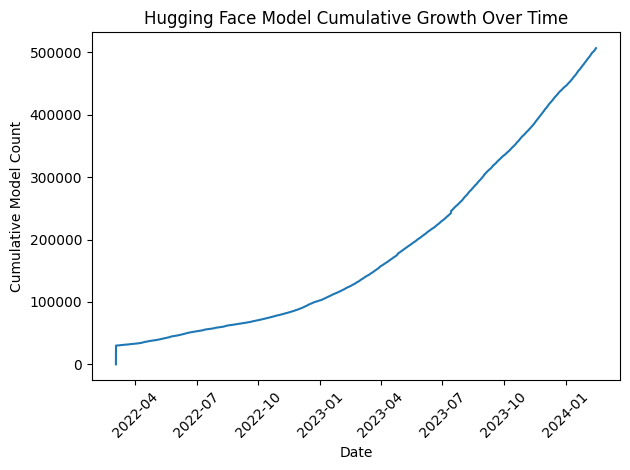

In [11]:
api = HfApi()
model_list = api.list_models()
i = 1000000
start = 0
dates = []
counts = []

for model in model_list:
  if start > 0:
    start -= 1
    continue
  
  if i == 0:
    break

  date = model.created_at
  dates.append(date)

  i -= 1
  counts.append(len(dates))

plt.plot(dates, counts)
plt.xlabel('Date')
plt.ylabel('Cumulative Model Count')
plt.title('Hugging Face Model Cumulative Growth Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

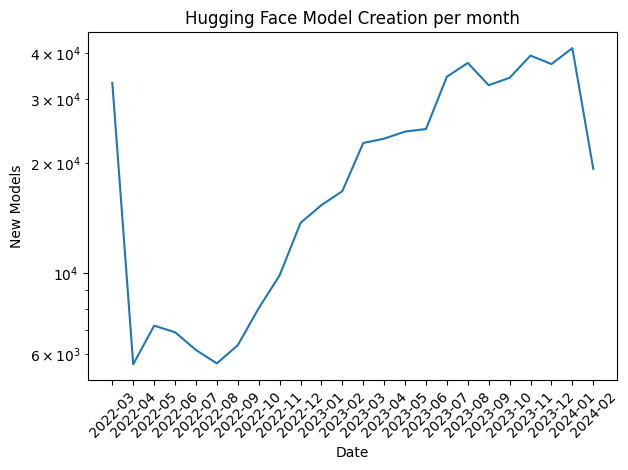

In [12]:
api = HfApi()
model_list = api.list_models()
i = 1000000
start = 0

dates = []
daily_counts_dict = defaultdict(int)

for model in model_list:
  if start > 0:
    start -= 1
    continue
  
  if i == 0:
    break

  date = model.created_at
  daily_counts_dict[date.strftime("%Y-%m")] += 1 # Add 1 for each model
  i-=1
  
dates = []
daily_counts_list = []
for date, count in daily_counts_dict.items():
  dates.append(date)
  daily_counts_list.append(count)
  
plt.plot(dates, daily_counts_list)
plt.xlabel('Date')
plt.ylabel('New Models') 
plt.title('Hugging Face Model Creation per month')
plt.xticks(rotation=45)

plt.yscale('log')

plt.tight_layout()
plt.show()

## Models being updated

The idea is to visualize how many models are being updated.

In the following graph will see how many models were last updated per month.

The first thing that changes from the previous graph is that we are using the `full = True` parameter in the [`api.list_models()`](https://huggingface.co/docs/huggingface_hub/v0.5.1/en/package_reference/hf_api#huggingface_hub.HfApi.list_models) function, that parameter allows us to bring more information about the models, including the last update date.

The second thing that changes is that we are using the `limit` parameter to bring X amount of models at a time.

While trying to use the `api.list_models(limit=250000, full = True)` function we found a problem with the amount of time a request can take. 

```
    IncompleteRead: IncompleteRead(15015817 bytes read, 278169 more expected)
```

In [26]:
api = HfApi()
i = 2000 
model_list = list(api.list_models(limit=i,full=True))
start = 0

dates = []
daily_counts_dict = defaultdict(int)
number_of_models_not_modified = 0

for model in model_list:
  if start > 0:
    start -= 1
    continue
  
  if i == 0:
    break

  date_created = model.created_at
  date_modified = model.last_modified
  if date_modified != None and date_modified!= date_created:
    daily_counts_dict[date_modified.strftime("%Y-%m")] += 1 # Add 1 for each model
  else:
    number_of_models_not_modified += 1
  
  i-=1
  
dates = []
daily_counts_list = []
sorted_daily_counts_dict = sorted(daily_counts_dict.items(), key=lambda x: x[0])

for date, count in sorted_daily_counts_dict:
  dates.append(date)
  daily_counts_list.append(count)

0


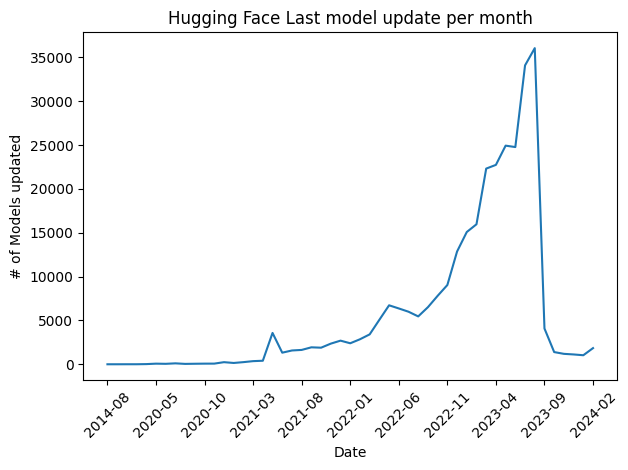

In [ ]:
import matplotlib.ticker as mtick

print(number_of_models_not_modified)
plt.plot(dates, daily_counts_list)
plt.xlabel('Date')
plt.ylabel('# of Models updated') 
plt.title('Hugging Face Last model update per month')
plt.xticks(rotation=45)
ax = plt.gca()  
ax.xaxis.set_major_locator(mtick.MultipleLocator(5))

# plt.yscale('log')

plt.tight_layout()
plt.show()

The problem with the above graph is that the models that are brought are ordered based in the creation time in acending order and the limit on the amount of models that can be brougt because of the `full = true` parameter. When using the `full=true` parameter a lot of files about the model are brought and that makes the errors that we have seen before appear.

Now the trick is to use a filter to bring batches of models based on the last modified date, and for that we can use the `sort="last_modified"` parameter and the `direction=1` parameter to control the order of the requests. When we use the `sort="last_modified"` parameter the objects in the response will also include the last modified date of the model without the need of bringing all the other unnecessary files.

In [37]:
i = 250000
from contextlib import closing

model_list_back = []
model_list_back = list(api.list_models(limit=i,sort="last_modified",direction=1))
model_list_front = list(api.list_models(limit=i,sort="last_modified",direction=-1))

model_list = model_list_back + model_list_front

dates = []
daily_counts_dict = defaultdict(int)
number_of_models_not_modified = 0

for model in model_list:

  date_created = model.created_at
  date_modified = model.last_modified
  if date_modified != None and date_modified!= date_created:
    daily_counts_dict[date_modified.strftime("%Y-%m")] += 1 # Add 1 for each model
  else:
    number_of_models_not_modified += 1
  
  i-=1
  
dates = []
daily_counts_list = []
sorted_daily_counts_dict = sorted(daily_counts_dict.items(), key=lambda x: x[0])

for date, count in sorted_daily_counts_dict:
  dates.append(date)
  daily_counts_list.append(count)

2014-08 1
2019-12 1
2020-01 4
2020-02 4
2020-04 20
2020-05 71
2020-06 52
2020-07 106
2020-08 44
2020-09 60
2020-10 73
2020-11 75
2020-12 240
2021-01 150
2021-02 244
2021-03 358
2021-04 402
2021-05 3574
2021-06 1322
2021-07 1573
2021-08 1636
2021-09 1934
2021-10 1892
2021-11 2355
2021-12 2695
2022-01 2395
2022-02 2851
2022-03 2785
2022-04 4169
2022-05 5695
2022-06 4593
2022-07 4916
2022-08 4286
2022-09 4842
2022-10 5619
2022-11 6421
2022-12 10467
2023-01 12251
2023-02 12903
2023-03 18044
2023-04 16908
2023-05 20154
2023-06 20116
2023-07 26274
2023-08 27838
2023-09 29323
2023-10 28848
2023-11 33893
2023-12 34396
2024-01 39361
2024-02 21547


# of models not modified:  80219


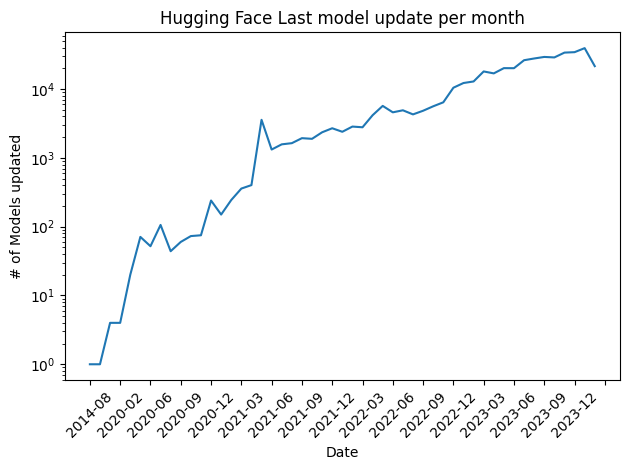

In [39]:
import matplotlib.ticker as mtick

print("# of models not modified: ", number_of_models_not_modified)
plt.plot(dates, daily_counts_list)
plt.xlabel('Date')
plt.ylabel('# of Models updated') 
plt.title('Hugging Face Last model update per month')
plt.xticks(rotation=45)
ax = plt.gca()  
ax.xaxis.set_major_locator(mtick.MultipleLocator(3))

plt.yscale('log')

plt.tight_layout()
plt.show()